# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import torch
from device import device

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

In [3]:
env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print("brain name:",brain_name)

brain name: BananaBrain


### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

The next code cell shows how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows to observe the agent, as it moves through the environment.  

As part of the project, the agent will be trained to use its experience to gradually choose better actions when interacting with the environment.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from unityagents import UnityEnvironment

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. Training the Agent

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="./Banana_Linux/Banana.x86_64")

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from agent import Agent


brain_name = env.brain_names[0]                  # get the default brain
print('Brain name:', brain_name)
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name] # reset the environment

print('Number of agents:', len(env_info.agents))

action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Brain name: BananaBrain
Number of agents: 1
Number of actions: 4
States look like: [0.         0.         1.         0.         0.16101955 1.
 0.         0.         0.         0.04571758 1.         0.
 0.         0.         0.2937662  0.         0.         1.
 0.         0.14386636 0.         0.         1.         0.
 0.16776823 1.         0.         0.         0.         0.04420976
 1.         0.         0.         0.         0.05423063 0.
 0.        ]
States have length: 37


In [10]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, min_score=13.0)
scores = agent.train(env=env, brain_name=brain_name, n_episodes=2000)

Episode 100	Average Score: 1.11
Episode 200	Average Score: 3.79
Episode 300	Average Score: 7.66
Episode 400	Average Score: 10.39
Episode 488	Average Score: 13.01
Environment solved in 388 episodes.	Average Score: 13.01


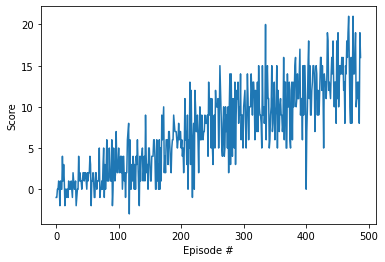

In [11]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Let the Trained Agent Take Actions in the Environment

In [24]:
# load the weights from file
agent.qnn_local.load_state_dict(torch.load('checkpoint.pth'))

n_episodes = 10

avg_score = 0

for i in range(n_episodes):
    env_info = env.reset(train_mode=False)[brain_name]
    state = env_info.vector_observations[0]  
    score = 0 
    for j in range(1000):
        action = agent.act(state)                      # let the agent act in given environment state
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                           
        if done:
            print("Episode: {} - Score: {}".format(i, score))
            avg_score += score
            break 

avg_score /= n_episodes
print("\nAverage score: {} through {} episodes".format(avg_score, n_episodes))

Episode: 0 - Score: 17.0
Episode: 1 - Score: 21.0
Episode: 2 - Score: 4.0
Episode: 3 - Score: 5.0
Episode: 4 - Score: 18.0
Episode: 5 - Score: 8.0
Episode: 6 - Score: 16.0
Episode: 7 - Score: 10.0
Episode: 8 - Score: 3.0
Episode: 9 - Score: 14.0

Average score: 11.6 through 10 episodes


In [25]:
env.close()